## Modelos lineales de regresión

Nombre y apellido:

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
from sklearn.linear_model import Ridge, LinearRegression

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
X, y = boston.data, boston.target

In [ ]:
print(boston.DESCR)

In [ ]:
X.shape

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

In [ ]:
np.mean(cross_val_score(LinearRegression(),
                        X_train, y_train, cv=10))

In [ ]:
np.mean(cross_val_score(
        Ridge(), X_train, y_train, cv=10))

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 14)}
print(param_grid)

In [ ]:
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

In [ ]:
import pandas as pd
plt.figure(dpi=200)
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score', ax=plt.gca())
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())

plt.legend()
plt.xscale("log")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, scale
X_poly = PolynomialFeatures(include_bias=False).fit_transform(scale(X))
print(X_poly.shape)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

In [ ]:
np.mean(cross_val_score(LinearRegression(),
                        X_train, y_train, cv=10))

In [ ]:
np.mean(cross_val_score(Ridge(),
                        X_train, y_train, cv=10))

In [ ]:
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

In [ ]:
results = pd.DataFrame(grid.cv_results_)

results.plot('param_alpha', 'mean_train_score', ax=plt.gca())
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.legend()
plt.xscale("log")

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
lr = LinearRegression().fit(X_train, y_train)
plt.scatter(range(X_poly.shape[1]), lr.coef_, c=np.sign(lr.coef_), cmap="bwr_r")

In [ ]:
ridge = grid.best_estimator_
plt.scatter(range(X_poly.shape[1]), ridge.coef_, c=np.sign(ridge.coef_), cmap="bwr_r")

In [ ]:
ridge100 = Ridge(alpha=100).fit(X_train, y_train)
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
plt.figure(figsize=(8, 4))

plt.plot(ridge1.coef_, 'o', label="alpha=1")
plt.plot(ridge.coef_, 'o', label="alpha=14")
plt.plot(ridge100.coef_, 'o', label="alpha=100")
plt.legend()

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Puntuacion del conjunto de entrenamiento: {:.2f}".format(lasso.score(X_train, y_train)))
print("Puntuacion del conjunto de prueba: {:.2f}".format(lasso.score(X_test, y_test)))
print("Numero de caracteristicas usadas :", np.sum(lasso.coef_ != 0))

### Ejercicios

1. Carga el conjunto de datos ``diabetes`` usando ``sklearn.datasets.load_diabetes``. Aplica ``LinearRegression``, ``Ridge`` y ``Lasso`` . Visualiza los coeficientes.



In [ ]:
## Tus soluciones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

Creamos un data frame para un dibujo interesante

(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <a list of 10 Patch objects>)

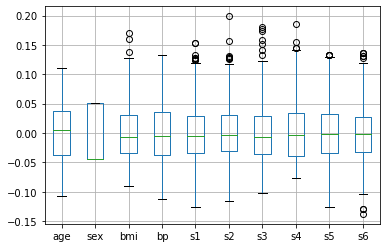

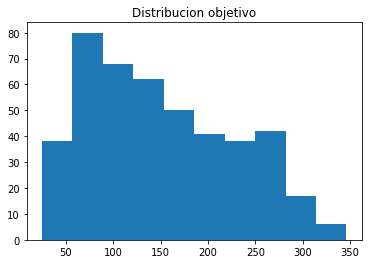

In [3]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.boxplot()

plt.figure()
plt.title("Distribucion objetivo")
plt.hist(diabetes.target, bins="auto")

In [4]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
                                                    diabetes.target)

scores_lr = cross_val_score(LinearRegression(), X_train, y_train, cv=10)
print("Puntuacion con regresion Lineal:", scores_lr.mean())
scores_ridge = cross_val_score(Ridge(), X_train, y_train, cv=10)
print("Puntuacion con regresion Ridge:", scores_ridge.mean())

Puntuacion con regresion Lineal: 0.49537484445552826
Puntuacion con regresion Ridge: 0.40225885124111327


Data escalada

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scores_lr = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=10)
print("Regression lineal con escalamiento:", scores_lr.mean())
scores_ridge = cross_val_score(Ridge(), X_train_scaled, y_train, cv=10)
print("Regresion Ridge con escalamiento:", scores_ridge.mean())


Regression lineal con escalamiento: 0.4953748444555283
Regresion Ridge con escalamiento: 0.49606254510150594


Text(0.5, 1.0, 'Busqueda Grid Ridge')

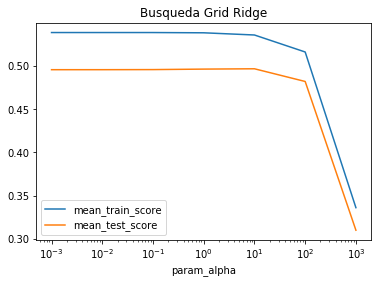

In [6]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 7)}
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train_scaled, y_train)

res = pd.DataFrame(grid.cv_results_)
res.plot("param_alpha", ["mean_train_score", "mean_test_score"], logx=True)
plt.title("Busqueda Grid Ridge")


In [7]:
print(grid.best_params_, grid.best_score_)

{'alpha': 10.0} 0.49644212901513346


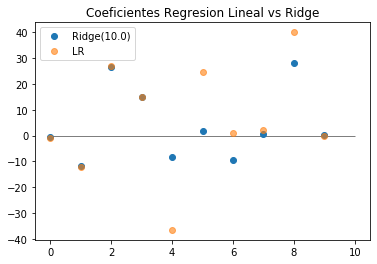

In [8]:
lr = LinearRegression().fit(X_train_scaled, y_train)

plt.figure()
plt.title("Coeficientes Regresion Lineal vs Ridge")
plt.hlines(0, 0, X_train.shape[1], linewidth=.5)
plt.plot(grid.best_estimator_.coef_, 'o', label="Ridge({})".format(grid.best_params_['alpha']))
plt.plot(lr.coef_, 'o', label="LR", alpha=.6)
plt.legend()

{'alpha': 1.0} 0.501932130726088


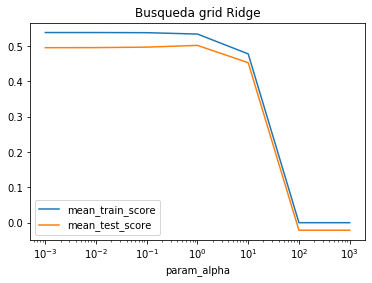

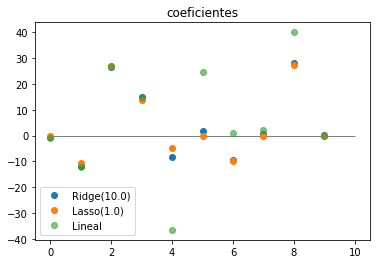

In [10]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 7)}
grid_lasso = GridSearchCV(Lasso(), param_grid, cv=10, return_train_score=True)
grid_lasso.fit(X_train_scaled, y_train)

res = pd.DataFrame(grid_lasso.cv_results_)
res.plot("param_alpha", ["mean_train_score", "mean_test_score"], logx=True)
plt.title("Busqueda grid Ridge")
print(grid_lasso.best_params_, grid_lasso.best_score_)

plt.figure()
plt.title("coeficientes")
plt.hlines(0, 0, X_train.shape[1], linewidth=.5)
plt.plot(grid.best_estimator_.coef_, 'o', label="Ridge({})".format(grid.best_params_['alpha']))
plt.plot(grid_lasso.best_estimator_.coef_, 'o', label="Lasso({})".format(grid_lasso.best_params_['alpha']))
plt.plot(lr.coef_, 'o', label="Lineal", alpha=.6)
plt.legend()

Características polinomiales

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

scores_lr = cross_val_score(LinearRegression(), X_train_poly, y_train, cv=10)
print("Caracteristicas polinomiales regresion lineal :", scores_lr.mean())
scores_ridge = cross_val_score(Ridge(), X_train_poly, y_train, cv=10)
print("Caracteristicas polinomiales Ridge:", scores_ridge.mean())

Caracteristicas polinomiales regresion lineal : 0.3566249939670022
Caracteristicas polinomiales Ridge: 0.4127237497340617


Text(0.5, 1.0, 'Busqueda grid con caracteristicas polinomiales')

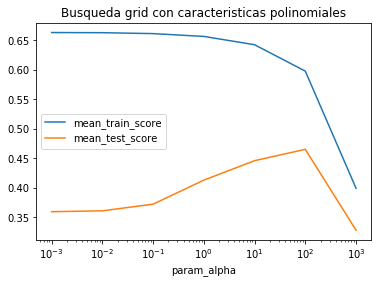

In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 7)}
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
grid.fit(X_train_poly, y_train)

res = pd.DataFrame(grid.cv_results_)
res.plot("param_alpha", ["mean_train_score", "mean_test_score"], logx=True)
plt.title("Busqueda grid con caracteristicas polinomiales")

In [13]:
print(grid.best_params_, grid.best_score_)

{'alpha': 100.0} 0.46485921904636907
